In [1]:
from manim import *

config.verbosity = "WARNING"

Manim Community v0.16.0.post0

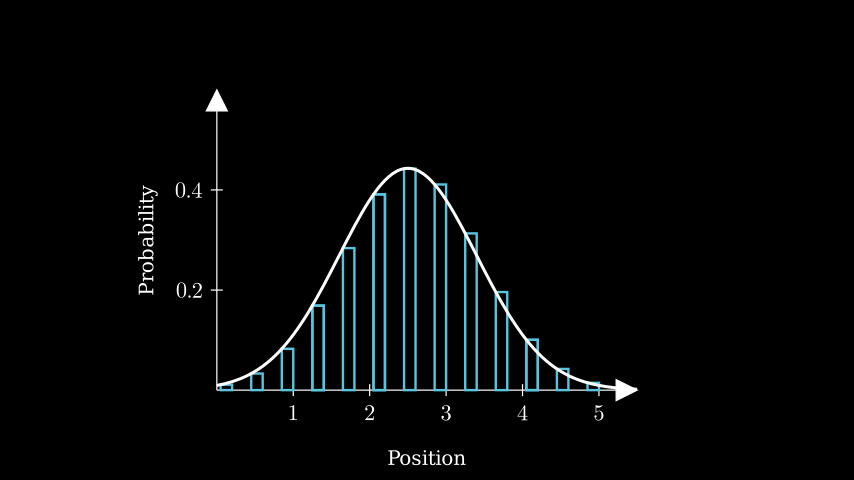

In [37]:
%%manim --quality=l -s ProbDistributionAnimation
# %%manim --quality=m ProbDistributionAnimation

from scipy.stats import norm

# Show how examples of probabilty combine to make a probability distribution
class ProbDistributionAnimation(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 5.5],
            y_range=[0, 0.6, 0.2],
            axis_config={"include_numbers": True},
            x_length=7,
            y_length=5,
        )
        x_label = ax.get_x_axis_label(
            Text("Position").scale(0.5), edge=DOWN, direction=DOWN, buff=0.5
        )
        y_label = ax.get_y_axis_label(
            Text("Probability").scale(0.5).rotate(90 * DEGREES),
            edge=LEFT,
            direction=LEFT,
            buff=0.3,
        )

        middle = 2.5
        example_boxes = []
        for x in [1.25, 4.05, 2.05]:
            start_x = x
            end_x = start_x + (0.15)
            probability = norm.pdf(start_x, loc=middle, scale=0.9)
            p = ax.coords_to_point(
                [[start_x, 0], [end_x, 0], [end_x, probability], [start_x, probability]]
            )
            r = Polygon(*p)
            example_boxes.append(r)

        x = 0.05
        all_boxes = []
        while x < 5:
            start_x = x
            end_x = start_x + (0.15)
            probability = norm.pdf(start_x, loc=middle, scale=0.9)
            p = ax.coords_to_point(
                [[start_x, 0], [end_x, 0], [end_x, probability], [start_x, probability]]
            )
            r = Polygon(*p)
            all_boxes.append(r)
            x += 0.4

        plot = ax.plot(lambda x: norm.pdf(x, loc=2.5, scale=0.9), stroke_width=5)

        # self.add(ax, x_label, y_label, g, plot)
        self.add(ax, x_label, y_label)
        for box in example_boxes:
            self.play(FadeIn(box))
        self.wait()
        self.pause(0.5)
        self.play(FadeIn(*all_boxes))
        self.wait()
        self.pause(0.5)
        self.play(DrawBorderThenFill(plot))
        self.wait()
        self.pause(5)

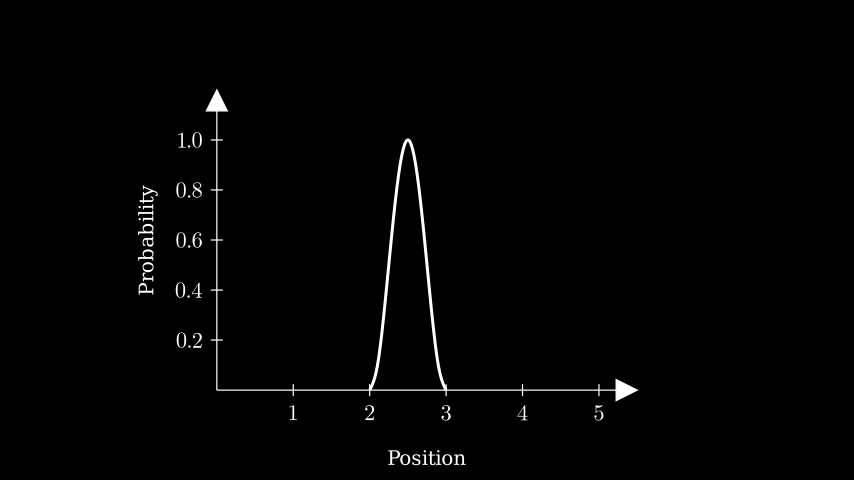

In [39]:
%%manim --quality=l --save_last_frame ParticleInABox
# %%manim --quality=m ParticleInABox

import numpy as np
import math

class ParticleInABox(Scene):
    """
    One dimensional solution to a particle in an infinite potential well
    The length of the well is L so the particle is constrained in that area
    """
    def construct(self):
        ax = Axes(
            x_range=[0, 5.5],
            y_range=[0, 1.2, 0.2],
            axis_config={"include_numbers": True},
            x_length=7,
            y_length=5,
        )
        x_label = ax.get_x_axis_label(
            Text("Position").scale(0.5), edge=DOWN, direction=DOWN, buff=0.5
        )
        y_label = ax.get_y_axis_label(
            Text("Probability").scale(0.5).rotate(90 * DEGREES),
            edge=LEFT,
            direction=LEFT,
            buff=0.3,
        )

        def psi(x, L, center):
            return 1/L*pow(math.cos((x-center)*math.pi/L), 2)
        
        L = 5
        center = 2.5
        plot1 = ax.plot(lambda x: psi(x, L, center), x_range=[0, 5], stroke_width=5)
        L = 1
        plot2 = ax.plot(lambda x: psi(x, L, center), x_range=[center - L/2, center + L/2], stroke_width=5)

        self.add(ax, x_label, y_label, plot1)
        self.pause(0.8)
        self.play(Transform(plot1, plot2))
        self.wait()
        self.pause(3)

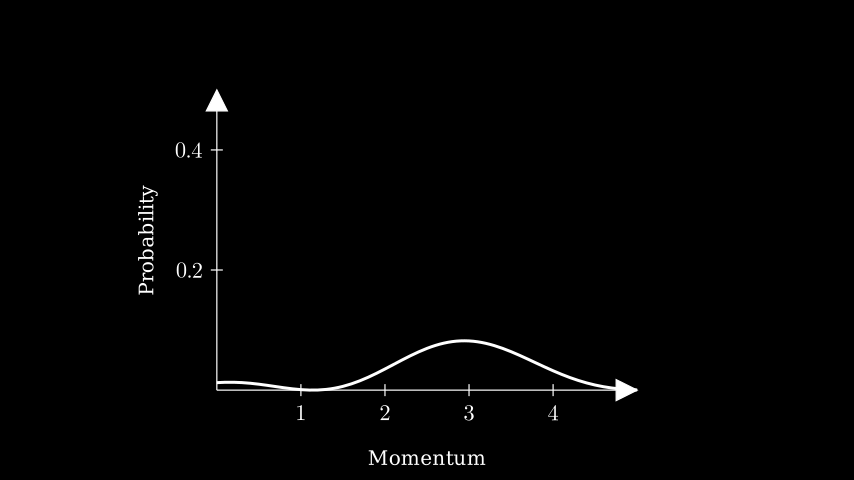

In [40]:
%%manim --quality=l --save_last_frame ParticleInABoxMomentum
# %%manim --quality=m ParticleInABoxMomentum

import numpy as np
import scipy as sp
import math

class ParticleInABoxMomentum(Scene):
    """
    One dimensional solution to a particle in an infinite potential well
    but momentum instead of position
    The length of the well is L so the particle is constrained in that area
    """
    def construct(self):
        ax = Axes(
            x_range=[0, 5],
            y_range=[0, 0.5, 0.2],
            axis_config={"include_numbers": True},
            x_length=7,
            y_length=5,
        )
        x_label = ax.get_x_axis_label(
            Text("Momentum").scale(0.5), edge=DOWN, direction=DOWN, buff=0.5
        )
        y_label = ax.get_y_axis_label(
            Text("Probability").scale(0.5).rotate(90 * DEGREES),
            edge=LEFT,
            direction=LEFT,
            buff=0.3,
        )

        def psi_p(p, L):
            return L/(np.pi)*(np.pi/(np.pi + p*L))**2*(np.sinc(0.5*(np.pi - p*L))**2)
        
        L = 5
        center = 2.5
        plot1 = ax.plot(lambda x: psi_p(x, L), stroke_width=5)
        L = 1
        plot2 = ax.plot(lambda x: psi_p(x, L), stroke_width=5)

        self.add(ax, x_label, y_label, plot1)
        self.pause(0.8)
        self.play(Transform(plot1, plot2))
        self.wait()
        self.pause(3)

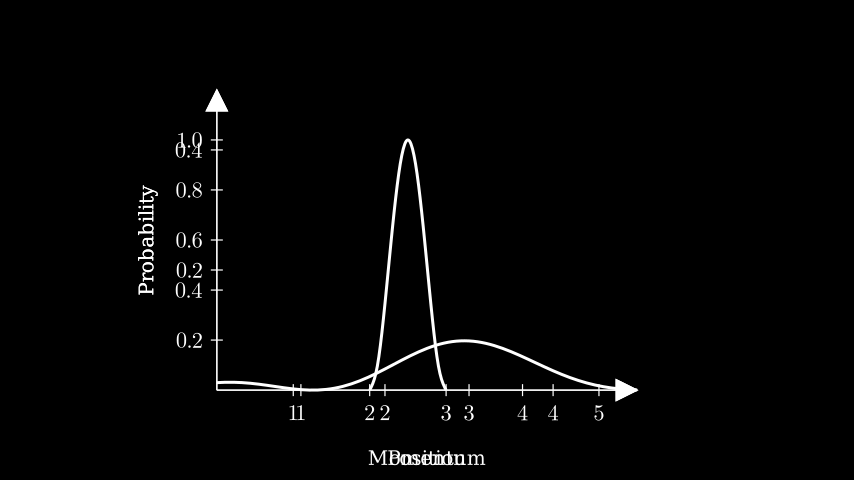

In [48]:
%%manim --quality=l --save_last_frame ParticleInABoxComposite
# %%manim --quality=m ParticleInABoxComposite

import numpy as np
import math

class ParticleInABoxComposite(Scene):
    """
    NOT WORKING. Will have to edit outside
    One dimensional solution to a particle in an infinite potential well
    combines the position and momentum
    """
    def construct(self):
        ParticleInABox.construct(self)
        ParticleInABoxMomentum.construct(self)


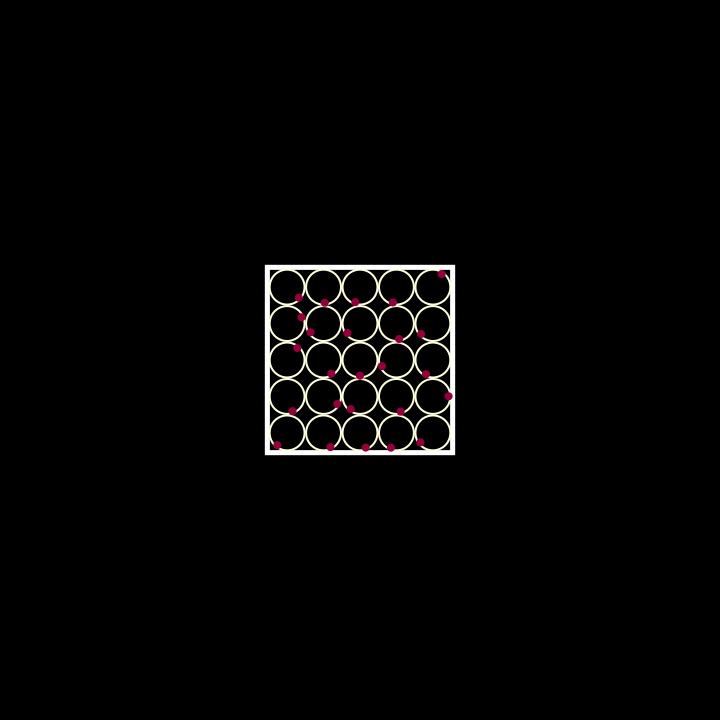

In [195]:
%%manim --quality=l -r 720,720 --save_last_frame NeutronStars
# %%manim --quality=m -r 720,720 NeutronStars
from manim.utils import rate_functions
import math
import numpy as np
import random
from scipy.spatial.transform import Rotation as R

class AnimHandler(Animation):
    def __init__(self, dots, circles, traced_paths, duration=10, **kwargs):
        super().__init__(dots, **kwargs)
        self._dots = dots
        self._circles = circles
        self._traced = traced_paths
        self._alpha = 0
        self._duration = duration

        self.normalized_acceleration = 5

        self.normalized_positions = {}
        self.normalized_velocities = {}
        self._colors = ['#ffffe0', '#ffecd2', '#ffdac4', '#ffc6b6', '#ffb3a7', '#ff9e99', '#fb8a8c', '#f4777f', '#eb6574', '#e15268', '#d5405e', '#c82d54', '#b81b4a', '#a70842', '#93003a'] 
        # https://www.vis4.net/palettes/#/9|s|ffffe0,ff005e,93003a|ffffe0,ff005e,93003a|1|1
        for i, dot in self._dots.submob_dict.items():
            self.normalized_positions[i] = np.array([0.0, 0, 0])
            theta = random.random()*math.pi
            self.normalized_velocities[i] = np.array([math.cos(theta), math.sin(theta), 0])
    def interpolate_mobject(self, alpha: float):
        target_color = self._colors[round(alpha*(len(self._colors) - 1))]
        dt = (alpha - self._alpha)*(self._duration/10) #normalize so behavior looks the same as you change duration
        # print(alpha, dt)
        c = self._circles.submob_dict
        r = c[0].width/2
        for i, dot in self._dots.submob_dict.items():
            center = c[i].get_center()
            self.normalized_velocities[i] += self.normalized_velocities[i]*self.normalized_acceleration*dt
            self.normalized_positions[i] +=  self.normalized_velocities[i]*dt
            if np.linalg.norm(self.normalized_positions[i]) > 1:
                self.normalized_positions[i] = 0.9*self.normalized_positions[i]/(np.linalg.norm(self.normalized_positions[i]))
                rot = R.from_euler('z', 90 + random.random()*180, degrees=True)
                self.normalized_velocities[i] = rot.apply(self.normalized_velocities[i])
            
            dot.set_x(center[0] + self.normalized_positions[i][0]*r)
            dot.set_y(center[1] + self.normalized_positions[i][1]*r)
            dot.set_z(center[2] + self.normalized_positions[i][2]*r)
            dot.set_fill(target_color)
            self._traced[i].stroke_color = target_color
        
        self._alpha = alpha

    def reset_for_static(self, duration):
        """Reset for non-accelerating animation"""
        self._alpha = 0
        self.normalized_acceleration = 0
        self._colors = [self._colors[-1]]
        self._duration = duration
        

class NeutronStars(Scene):
    def construct(self):
        box_size = 12
        r = Square(side_length=box_size + 0.2, stroke_width=10)
        # k = self.make_particle(0, 1, r, 5*5)
        buf=0.1
        count = 25
        count_on_side = math.sqrt(count)
        radius = 0.5*(box_size - buf*count_on_side)/count_on_side
        circles = VDict([(i, Circle(radius, color="#ffffe0")) for i in range(0, count)])
        circles.arrange_in_grid(rows=int(count_on_side), buff=buf)

        dots = VDict([(i, Dot(point=c.get_center())) for (i,c) in circles.submob_dict.items()])
        t = VDict([(i, TracedPath(dot.get_center, dissipating_time=0.5)) for (i, dot) in dots.submob_dict.items()])
        self.add(r, circles, dots, t)
        a = AnimHandler(dots, circles, t)
        self.play(ScaleInPlace(circles, 0.3), ScaleInPlace(r, 0.3), a, run_time=10, run_func=linear)
        a.reset_for_static(5)
        self.play(a, run_time=5, run_func=linear)
    # def make_particle(self, index, momentum, box, total_particles):
    #     # Assume total_particles is a perfect square
    #     center = box.get_center()
    #     width = box.width
    #     height = box.height
    #     count_on_side = math.sqrt(total_particles)
    #     radius = 0.5*width/count_on_side
    #     x_index = index % count_on_side
    #     y_index = index // count_on_side
    #     buffer = radius*0.15

    #     position = [center[0] - (width/2) + (x_index*radius) + radius + buffer, center[1] - height/2 + y_index*radius + radius + buffer, center[2]]
    #     return Circle(radius=radius, arc_center=position)
